## Installing Required Libraries

In [1]:
! pip install pandas networkx scipy matplotlib seaborn

^C


  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pillow-11.2.1-cp312-cp312-win_amd64.whl.metadata (9.1 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
   ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
   ------ --------------------------------- 6.6/40.9 MB 31.0 MB/s eta 0:00:02
   ------------- -------------------------- 13.9/40.9 MB 32.3 MB/s eta 0:00:01
   ------------------ --------------------- 18.9/40.9 MB 29.8 MB/s eta 0:00:01
   ----------------------- ---------------- 24.4/40.9 MB 28.6 MB/s eta 0:00:01
   ------------------------------- -------- 32.2/40.9 MB 30.5 MB/s eta 0:00:01
   ------------------------------------- -- 38.3/40.9 MB 30.0 MB/s eta 0:00:01
   ---------------------------------------  40.9/40.9 MB 30.2 MB/s eta 0:00:01
   ---------------------------------------- 40.9/40.9 MB 26.6 MB/s eta 0:00:00
   ---------------------------------------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Loading the Network using csv files

In [ ]:
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal, f_oneway
import numpy as np


edges_df = pd.read_csv("/kaggle/input/newedges/filtered_edges.csv")  


metadata_df = pd.read_csv("/kaggle/input/nsdata/combined_dataset.csv")  

G = nx.Graph()
G.add_edges_from(edges_df[['id_0', 'id_1']].values)


## Cross-Border Collaboration Patterns in the Global Music Network

collab_type
inter    94226
intra    64006
Name: count, dtype: int64


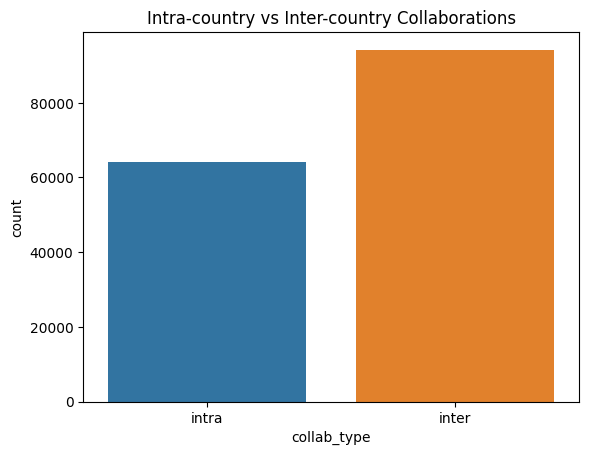

In [ ]:

country_lookup = metadata_df.set_index('spotify_id')['country'].to_dict()

def country_relation(row):
    c1 = country_lookup.get(row['id_0'])
    c2 = country_lookup.get(row['id_1'])
    return 'intra' if c1 == c2 else 'inter'

edges_df['collab_type'] = edges_df.apply(country_relation, axis=1)

print(edges_df['collab_type'].value_counts())

sns.countplot(data=edges_df, x='collab_type')
plt.title("Intra-country vs Inter-country Collaborations")
plt.show()


## Multi-Level Assortativity in Music Collaboration Networks: Connectivity and Popularity


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


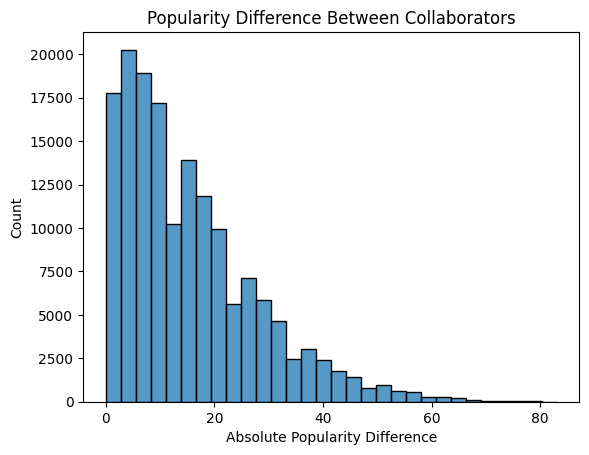

Average popularity difference: 15.48


In [ ]:

pop_lookup = metadata_df.set_index('spotify_id')['popularity'].to_dict()


def pop_diff(row):
    p1 = pop_lookup.get(row['id_0'], np.nan)
    p2 = pop_lookup.get(row['id_1'], np.nan)
    return abs(p1 - p2) if pd.notna(p1) and pd.notna(p2) else np.nan

edges_df['pop_diff'] = edges_df.apply(pop_diff, axis=1)

# Plot
sns.histplot(edges_df['pop_diff'].dropna(), bins=30)
plt.title("Popularity Difference Between Collaborators")
plt.xlabel("Absolute Popularity Difference")
plt.show()

print(f"Average popularity difference: {edges_df['pop_diff'].mean():.2f}")


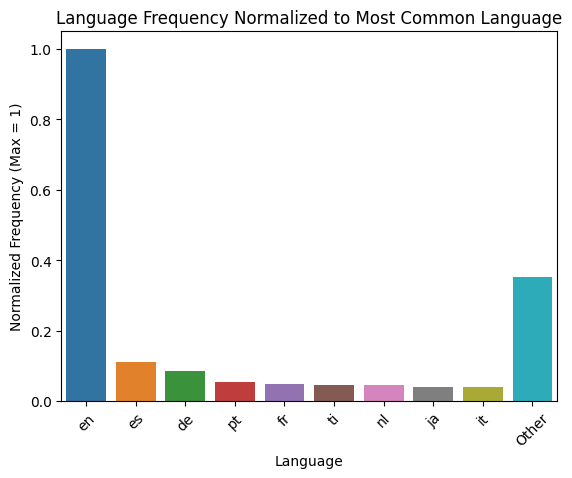

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


lang_counts_all = metadata_df['language'].value_counts()


top_langs = lang_counts_all.head(9)
other_count = lang_counts_all[9:].sum()

lang_counts_top10 = pd.concat([top_langs, pd.Series({'Other': other_count})])


max_count = lang_counts_top10.max()
lang_counts_normalized = lang_counts_top10 / max_count

# Plot
sns.barplot(x=lang_counts_normalized.index, y=lang_counts_normalized.values)
plt.title("Language Frequency Normalized to Most Common Language")
plt.xlabel("Language")
plt.ylabel("Normalized Frequency (Max = 1)")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.show()


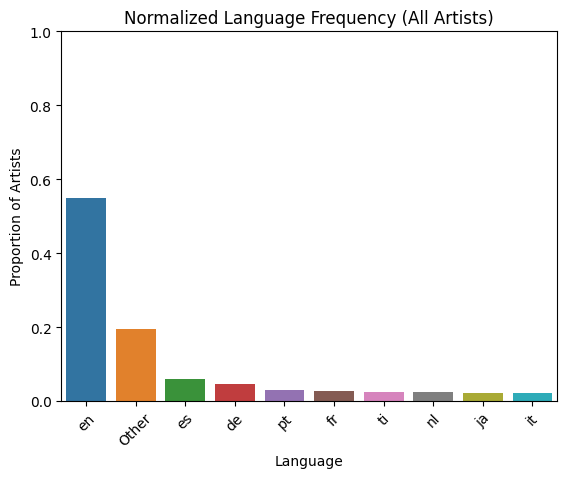

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


lang_counts_all = metadata_df['language'].value_counts()


lang_freq = lang_counts_all / lang_counts_all.sum()


top_langs = lang_freq.head(9)
other_sum = lang_freq[9:].sum()


lang_freq_top10 = pd.concat([top_langs, pd.Series({'Other': other_sum})])


lang_freq_top10 = lang_freq_top10.sort_values(ascending=False)


sns.barplot(x=lang_freq_top10.index, y=lang_freq_top10.values)
plt.title("Normalized Language Frequency (All Artists)")
plt.xlabel("Language")
plt.ylabel("Proportion of Artists")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


## Collaborations and Commercial Success in the Music Network


📊 Correlation Matrix:
              degree  followers  popularity
degree      1.000000   0.337096    0.405327
followers   0.337096   1.000000    0.298534
popularity  0.405327   0.298534    1.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


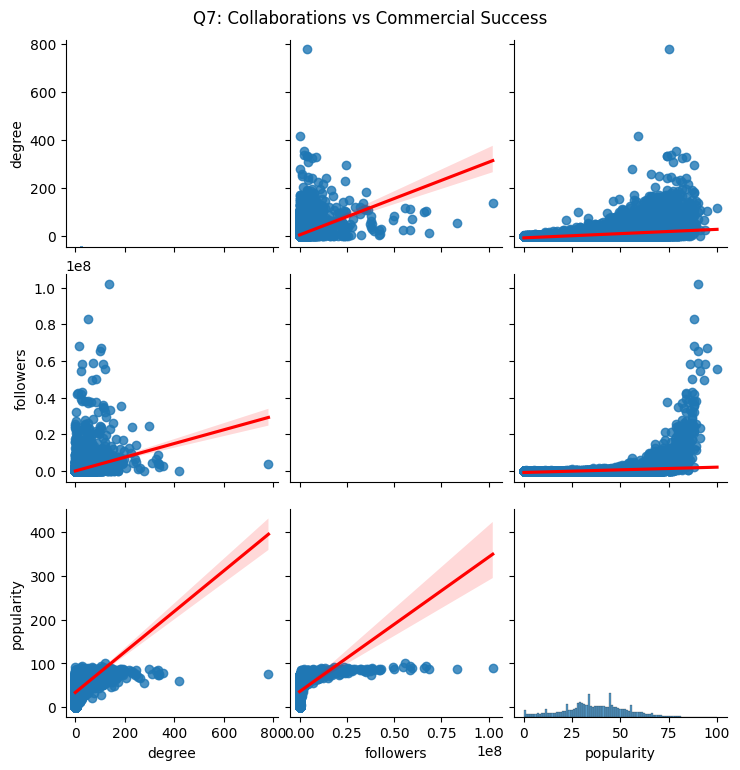

In [ ]:
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt


edges_df = pd.read_csv("/kaggle/input/newedges/filtered_edges.csv")  # id_0, id_1


metadata_df = pd.read_csv("/kaggle/input/nsdata/combined_dataset.csv")  # spotify_id, followers, popularity

# Build graph
G = nx.Graph()
G.add_edges_from(edges_df[['id_0', 'id_1']].values)

degree_dict = dict(G.degree())
degree_df = pd.DataFrame(degree_dict.items(), columns=['spotify_id', 'degree'])


metadata = pd.merge(metadata_df, degree_df, on='spotify_id', how='left')
metadata['degree'] = metadata['degree'].fillna(0)


metadata['followers'] = pd.to_numeric(metadata['followers'], errors='coerce')
metadata['popularity'] = pd.to_numeric(metadata['popularity'], errors='coerce')

metadata_clean = metadata.dropna(subset=['degree', 'followers', 'popularity'])

# Correlation analysis
print("📊 Correlation Matrix:")
print(metadata_clean[['degree', 'followers', 'popularity']].corr())

# Visualization
sns.pairplot(metadata_clean, vars=['degree', 'followers', 'popularity'], kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle("Q7: Collaborations vs Commercial Success", y=1.02)
plt.show()


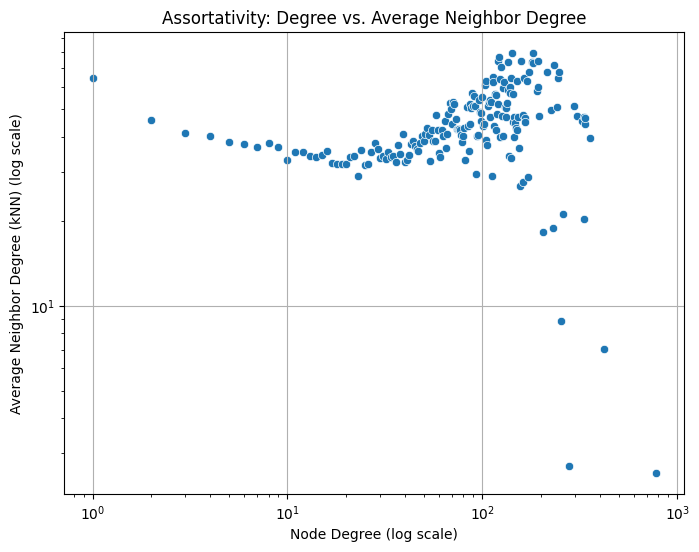

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns


edges_df = pd.read_csv("/kaggle/input/newedges/filtered_edges.csv")  # id_0, id_1


G = nx.Graph()
G.add_edges_from(edges_df[['id_0', 'id_1']].values)

degree_dict = dict(G.degree())
knn_dict = nx.average_neighbor_degree(G)

assort_df = pd.DataFrame({
    'spotify_id': list(degree_dict.keys()),
    'degree': list(degree_dict.values()),
    'knn': [knn_dict[node] for node in degree_dict]
})

binned = assort_df.groupby('degree')['knn'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=binned, x='degree', y='knn')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Node Degree (log scale)')
plt.ylabel('Average Neighbor Degree (kNN) (log scale)')
plt.title('Assortativity: Degree vs. Average Neighbor Degree')
plt.grid(True)
plt.show()


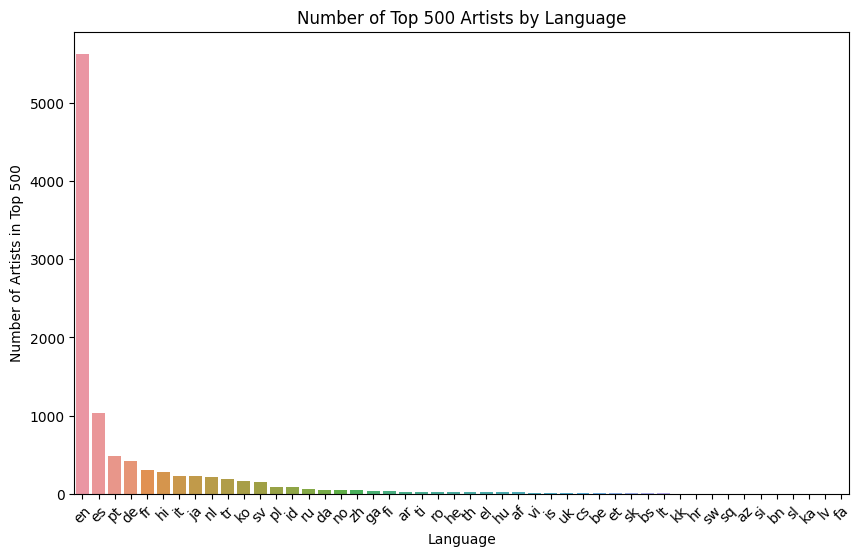

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

top_500_artists = metadata_df.sort_values(by='popularity', ascending=False).head(10000)

language_counts = top_500_artists['language'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.title("Number of Top 500 Artists by Language")
plt.xlabel("Language")
plt.ylabel("Number of Artists in Top 500")
plt.xticks(rotation=45)
plt.show()


## Do Global Language Hubs Predict Music Fame? An Empirical Counterpoint


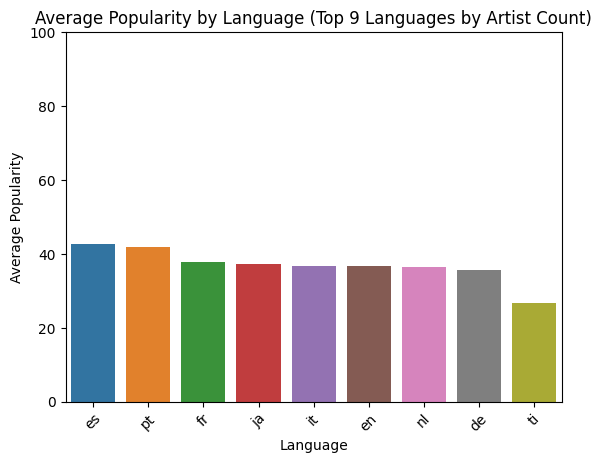

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

lang_popularity = metadata_df.groupby('language')['popularity'].mean()


top_langs = metadata_df['language'].value_counts().head(9).index


lang_popularity_top = lang_popularity.loc[top_langs]

lang_popularity_top = lang_popularity_top.sort_values(ascending=False)

# Plot
sns.barplot(x=lang_popularity_top.index, y=lang_popularity_top.values)
plt.title("Average Popularity by Language (Top 9 Languages by Artist Count)")
plt.xlabel("Language")
plt.ylabel("Average Popularity")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()
